# **About Dataset**

This dataset contains information about used cars.
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
The columns in the given dataset are as follows:

1.name

2.year

3.selling_price

4.km_driven

5.fuel

6.seller_type

7.transmission

8.Owner

# Importing the Dependencies


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Collection and Preprocessing

Data Collection and Preprocessing: Gathered a comprehensive dataset containing information about various car features, including make, model, year, mileage, fuel type, and engine specifications. Conducted thorough data cleaning and preprocessing to ensure data quality.

In [2]:
#Reading dataset as pandas dataframe
df = pd.read_csv('car data.csv')

In [83]:
#Reading first 5 rows of our dataset
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [4]:
df.keys()

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [79]:
#Checking number of examples and features
df.shape

(301, 9)

In [6]:
# getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
#Summarizing the stats of the data
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


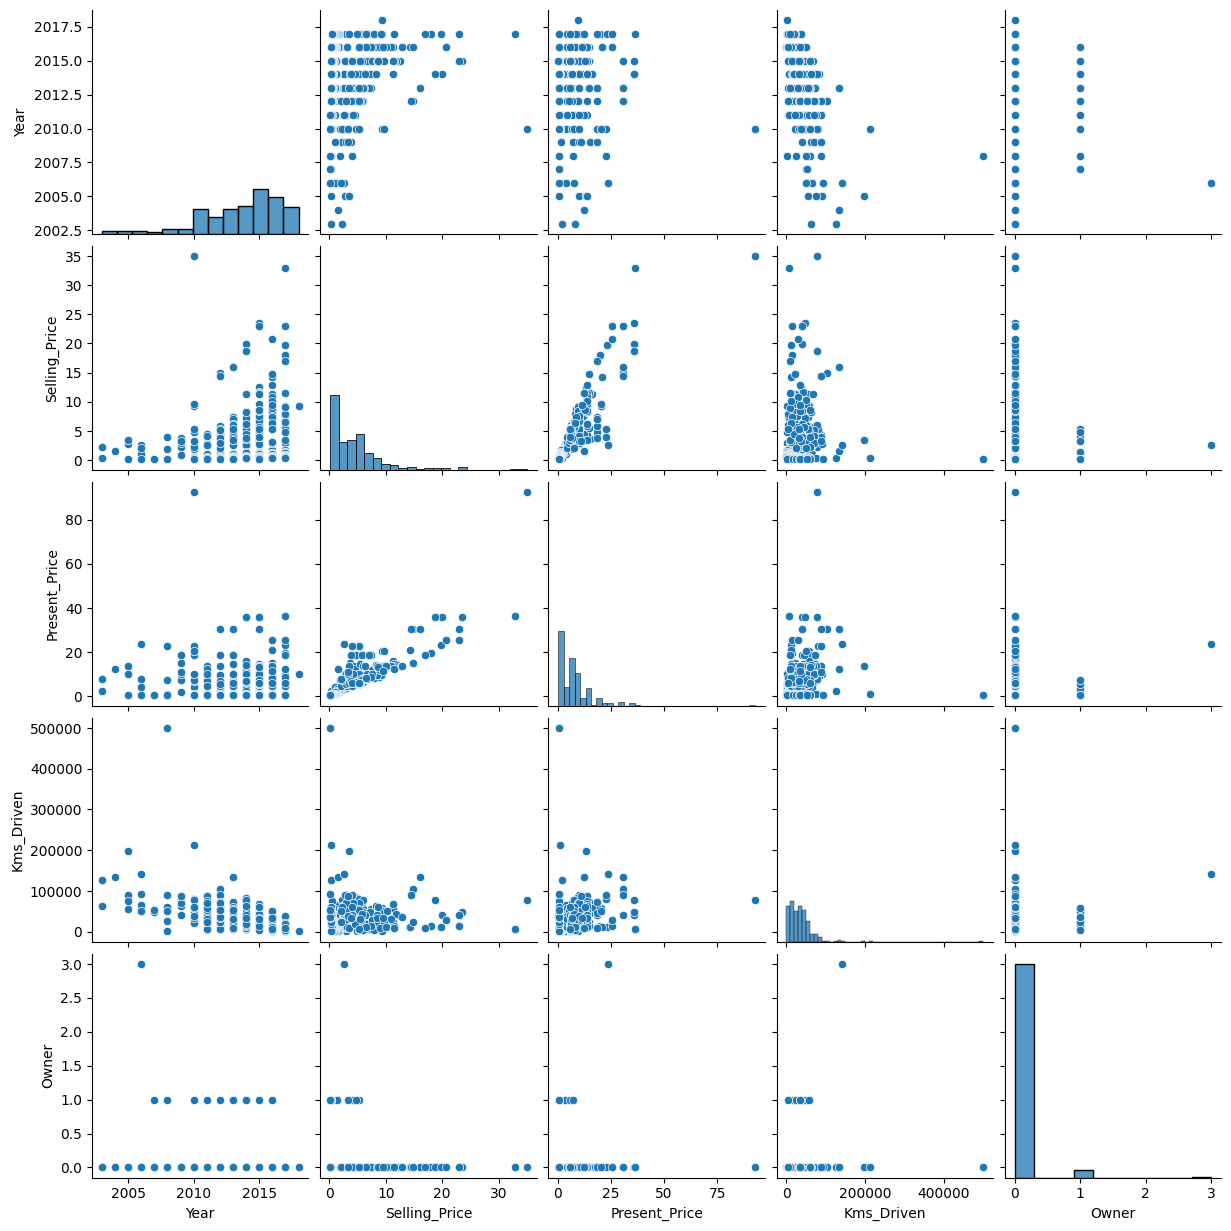

In [8]:
sns.pairplot(df)

Text(0, 0.5, 'Price')

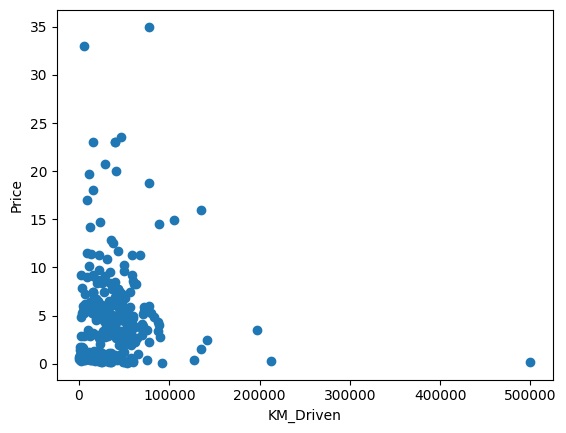

In [9]:
plt.scatter(df['Kms_Driven'],df['Selling_Price'])
plt.xlabel("KM_Driven")
plt.ylabel("Price")

# Feature Engineering

Feature Engineering: Engineered relevant input features, including categorical encoding, feature scaling, and handling missing values, to prepare the data for regression modeling.

Here, we have 3 categorical columns: Fuel_type, Seller_type, Transmission and car_name but we will drop the car_name column.

In [24]:
# checking the number of missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Encoding the categorical data

In [25]:
# checking the distribution of categorical data
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [26]:
# encoding "Fuel_Type" Column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [27]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


We successfully converted categorical features into numerical features


## Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

In [71]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']

In [72]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [31]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [32]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,
                                               test_size=0.2,
                                               random_state=42)

In [84]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [85]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [86]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [89]:
X_train

array([[-1.96986094, -0.75359579, -0.27555466, ...,  1.33816952,
        -0.37796447,  3.52821143],
       [ 1.15644297, -0.73130669, -0.81428242, ...,  1.33816952,
        -0.37796447, -0.18569534],
       [-1.96986094, -0.7494723 ,  0.29908829, ...,  1.33816952,
        -0.37796447, -0.18569534],
       ...,
       [ 0.11434167, -0.45269297, -0.50301749, ...,  1.33816952,
        -0.37796447,  3.52821143],
       [-0.92775963,  0.27727498,  0.76217867, ..., -0.74728947,
        -0.37796447, -0.18569534],
       [ 1.15644297, -0.63880693, -0.8023107 , ...,  1.33816952,
        -0.37796447, -0.18569534]])

In [90]:
X_test

array([[ 0.80907587, -0.77365597, -0.32344157, -0.48236665,  1.33816952,
         2.64575131, -0.18569534],
       [ 0.80907587,  0.67847874, -0.63518537, -0.48236665, -0.74728947,
        -0.37796447, -0.18569534],
       [-0.58039253,  0.21040769,  0.53852285,  1.88024551, -0.74728947,
        -0.37796447, -0.18569534],
       [-0.92775963, -0.77365597, -0.06006356, -0.48236665,  1.33816952,
        -0.37796447,  3.52821143],
       [-0.23302543,  1.23682064,  0.05967767, -0.48236665, -0.74728947,
        -0.37796447, -0.18569534],
       [ 0.46170877,  0.15691385,  0.11632788,  1.88024551, -0.74728947,
        -0.37796447, -0.18569534],
       [ 0.46170877, -0.67335503, -0.27555466, -0.48236665,  1.33816952,
        -0.37796447, -0.18569534],
       [ 0.11434167, -0.73910787, -0.70653687, -0.48236665,  1.33816952,
        -0.37796447, -0.18569534],
       [ 0.80907587, -0.77699934, -0.56287614, -0.48236665,  1.33816952,
        -0.37796447, -0.18569534],
       [ 0.11434167,  0.2717

# Model Training

Model Training and Evaluation: Split the dataset into training and testing sets to train and validate the selected regression model. Employed evaluation metrics R-squared to quantify the model's predictive accuracy.

# Random Forest Regressor

In [96]:
##Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor


In [97]:
#Initializing the model
model_RF = RandomForestRegressor(n_estimators=5)

In [98]:
#Train the model
model_RF.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=5)

Accuracy of the Model

In [100]:
#Training Accuracy
model_RF.score(X_train, Y_train)

0.9801289674560597

In [101]:
#Test Accuracy
model_RF.score(X_test, Y_test)


0.9679188575309854

In [103]:
model_RF.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(n_estimators=5)>

Visualizing actual and predicted prices on training dataset

In [104]:
# prediction on Training data
training_data_prediction = model_RF.predict(X_train)

In [105]:
#Actual training price
print(Y_train[0])

3.35


In [106]:
#PRedicted training  price
print(training_data_prediction[0])

0.25


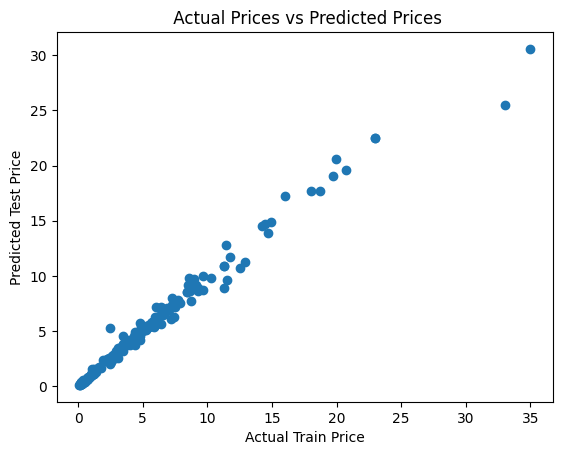

In [107]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Train Price")
plt.ylabel("Predicted Test Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()


Visualiziing actual vs predicted prices on test dataset

In [108]:
# prediction on Test data
test_data_prediction = model_RF.predict(X_test)

In [109]:
#Actual test price
print(Y_test[0:1])

177    0.35
Name: Selling_Price, dtype: float64


In [110]:
#Predicted test price
print(test_data_prediction[0:1])

[0.4]


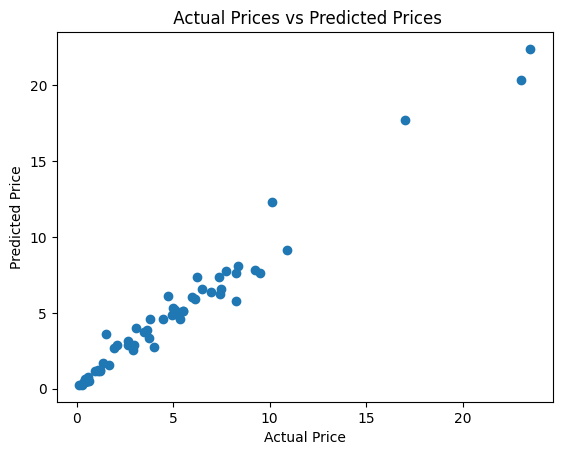

In [111]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

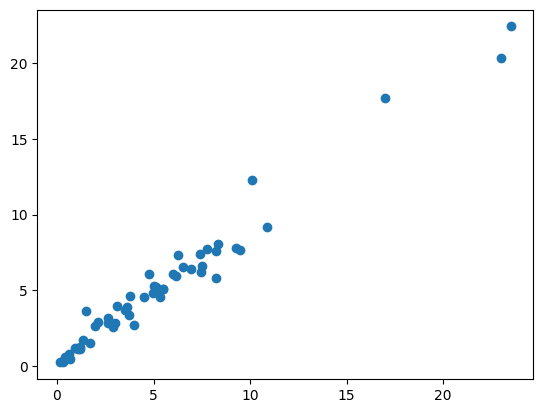

In [112]:
## plot a scatter plot for the prediction
plt.scatter(Y_test,test_data_prediction)

Residuals

In [113]:
residual=Y_test-test_data_prediction

In [114]:
residual

177   -0.050
289   -2.180
228    0.120
198   -0.096
60     0.560
       ...  
234    0.380
296    1.850
281   -0.810
285    0.022
182    0.034
Name: Selling_Price, Length: 61, dtype: float64

In [73]:
def predict_car_price(model, input_features):
    input_features = np.array(input_features).reshape(1, -1)
    predicted_price = model.predict(input_features)

    return predicted_price[0]

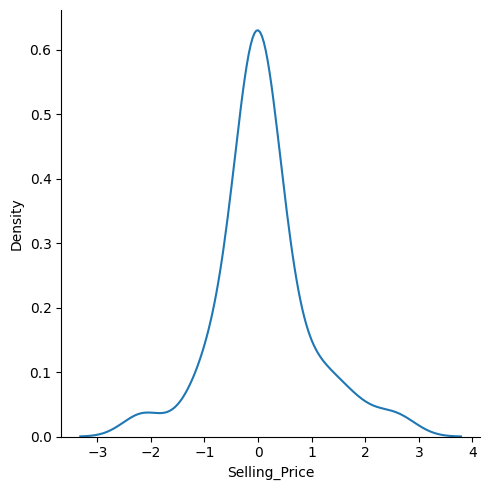

In [116]:
## Plot this residuals 

sns.displot(residual,kind="kde")


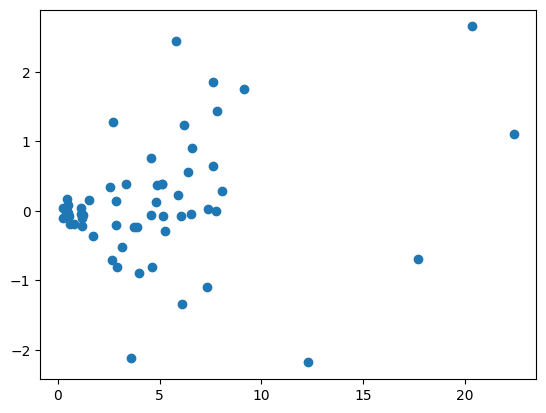

In [118]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(test_data_prediction,residual)

## Prediction on New Data


In [123]:
X.iloc[0].values.reshape(1, -1)

array([[2.014e+03, 5.590e+00, 2.700e+04, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00]])

In [127]:
##transformation of new data
scaler.transform(X.iloc[0].values.reshape(1,-1))

d:\CarPriceModel\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.11434167, -0.21419962, -0.25161121, -0.48236665, -0.74728947,
        -0.37796447, -0.18569534]])

In [128]:
model_RF.predict(scaler.transform(X.iloc[0].values.reshape(1,-1)))

d:\CarPriceModel\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([3.56])

## Pickling model for Deployment

In [130]:
import pickle


In [131]:
pickle.dump(model_RF,open('regmodel.pkl','wb'))

In [132]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [133]:
#Predicition 

pickled_model.predict(scaler.transform(X.iloc[0].values.reshape(1,-1)))

d:\CarPriceModel\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([3.56])